In [1]:
%reset -f
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
from linearmodels.iv import IV2SLS
import functions as fun
import statsmodels.formula.api as sm
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('dataset.csv')
Nobs=df['ID'].count()
df['Intercept']=np.ones((Nobs,1))
df.rename(columns={'Market share':'Market_share'}, inplace=True)
df2 = df[df['Market_share'] != 0]

df2.head(20)

,ID,Year,Market_share,Manufacturer,Model,Range,Price,HP,Chargetime,Type,Segment,Country,Sales,Intercept
8,1,2021,0.010373,Aiways,U5,400,284621.700,201,34,SUV,C,CN,257,1.0
9,1,2022,0.005976,Aiways,U5,400,313681.829,201,34,SUV,C,CN,183,1.0
10,1,2023,0.002860,Aiways,U5,400,264524.000,201,34,SUV,C,CN,177,1.0
21,2,2023,0.000048,Aiways,U6,405,360638.000,214,34,SUV,C,CN,3,1.0
28,3,2019,0.040630,Audi,e-tron,375,979704.475,402,17,SUV,F,DE,222,1.0
29,3,2020,0.034680,Audi,e-tron,375,890101.410,402,17,SUV,F,DE,491,1.0
30,3,2021,0.010494,Audi,e-tron,375,800035.193,402,17,SUV,F,DE,260,1.0
31,3,2022,0.017570,Audi,e-tron,375,789723.656,402,17,SUV,F,DE,538,1.0
32,3,2023,0.001099,Audi,e-tron,375,673037.728,402,17,SUV,F,DE,68,1.0
41,4,2021,0.003391,Audi,e-tron GT,472,1278896.110,522,17,Sedan,F,DE,84,1.0


In [3]:
# Copy the dataframe
data = df2.copy().reset_index(drop=True)
data.head(20)

,ID,Year,Market_share,Manufacturer,Model,Range,Price,HP,Chargetime,Type,Segment,Country,Sales,Intercept
0,1,2021,0.010373,Aiways,U5,400,284621.700,201,34,SUV,C,CN,257,1.0
1,1,2022,0.005976,Aiways,U5,400,313681.829,201,34,SUV,C,CN,183,1.0
2,1,2023,0.002860,Aiways,U5,400,264524.000,201,34,SUV,C,CN,177,1.0
3,2,2023,0.000048,Aiways,U6,405,360638.000,214,34,SUV,C,CN,3,1.0
4,3,2019,0.040630,Audi,e-tron,375,979704.475,402,17,SUV,F,DE,222,1.0
5,3,2020,0.034680,Audi,e-tron,375,890101.410,402,17,SUV,F,DE,491,1.0
6,3,2021,0.010494,Audi,e-tron,375,800035.193,402,17,SUV,F,DE,260,1.0
7,3,2022,0.017570,Audi,e-tron,375,789723.656,402,17,SUV,F,DE,538,1.0
8,3,2023,0.001099,Audi,e-tron,375,673037.728,402,17,SUV,F,DE,68,1.0
9,4,2021,0.003391,Audi,e-tron GT,472,1278896.110,522,17,Sedan,F,DE,84,1.0


In [4]:
#Scale for better intepretation

data['Price'] = data['Price']/10_000 #(Change in ms(%) for change in pris in 10.000)
data['HP'] = data['HP']/10           #(Change in ms(%) for change in HP in 10)
data['Range'] = data['Range']/10     #(Change in ms(%) for change in rækkevidde in 10)

In [5]:
# Creating dummy for china
data['China'] = (data['Country'] == 'CN').astype(int)

In [6]:
data = data.sort_values(['Year', 'ID']).reset_index(drop=True)

# IV

In [7]:
fun.GH(data, 'Range', 0.5)
fun.GH(data, 'HP', 0.5)
fun.GH(data, 'Chargetime', 0.5)

,ID,Year,Market_share,Manufacturer,Model,Range,Price,HP,Chargetime,Type,Segment,Country,Sales,Intercept,China,Range_GH,HP_GH,Chargetime_GH
0,10,2013,0.002237,BMW,I3,29.5,25.00000,16.7,18,Hatchback,B,DE,1,1.0,0,110.1,83.6,237
1,132,2013,0.472036,Nissan,Leaf,32.8,25.36900,14.7,43,Hatchback,C,JP,211,1.0,0,99.2,67.5,164
2,158,2013,0.205817,Renault,Zoe,36.5,17.31500,13.4,56,Hatchback,B,FR,92,1.0,0,128.7,67.5,139
3,167,2013,0.002237,Smart,Fortwo,12.7,21.04575,8.0,60,Hatchback,A,DE,1,1.0,0,185.3,84.2,139
4,173,2013,0.250559,Tesla,Model S,60.9,71.95631,67.5,30,Liftback,F,US,112,1.0,0,137.1,60.9,225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,187,2023,0.001277,Volkswagen,up!,25.6,17.48530,8.1,48,Hatchback,A,DE,79,1.0,0,3737.4,2269.0,2733
330,188,2023,0.008354,Volvo,C40,46.6,43.06649,40.2,28,SUV,C,SE,517,1.0,0,2212.4,1978.6,1813
331,189,2023,0.000065,Volvo,EX30,47.5,36.82450,26.8,28,SUV,B,SE,4,1.0,0,2189.4,1777.6,1813
332,190,2023,0.031752,Volvo,XC40,45.7,43.92666,40.2,28,SUV,C,SE,1965,1.0,0,2206.7,1978.6,1813


In [8]:
formula = 'np.log(Market_share) ~ 1 + [Price ~ Range_GH + HP_GH + Chargetime_GH] + Range + HP + Chargetime + China '
IV = IV2SLS.from_formula(formula, data).fit(cov_type='robust')
IV.summary#.tables[1]

<class 'linearmodels.compat.statsmodels.Summary'>
"""
                           IV-2SLS Estimation Summary                           
================================================================================
Dep. Variable:     np.log(Market_share)   R-squared:                     -1.1894
Estimator:                      IV-2SLS   Adj. R-squared:                -1.2228
No. Observations:                   334   F-statistic:                    73.809
Date:                  Mon, May 27 2024   P-value (F-stat)                0.0000
Time:                          18:27:55   Distribution:                  chi2(5)
Cov. Estimator:                  robust                                         
                                                                                
                             Parameter Estimates                              
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept     -4.6767     1.4901    -3.1386     0.0017     -7.5972     -1.7562
Range          0.1395     0.0231     6.0487     0.0000      0.0943      0.1847
HP             0.1587     0.0585     2.7127     0.0067      0.0440      0.2734
Chargetime    -0.0478     0.0201    -2.3749     0.0176     -0.0872     -0.0083
China         -3.7943     0.6345    -5.9798     0.0000     -5.0380     -2.5507
Price         -0.1722     0.0448    -3.8463     0.0001     -0.2599     -0.0844
==============================================================================

Endogenous: Price
Instruments: Range_GH, HP_GH, Chargetime_GH
Robust Covariance (Heteroskedastic)
Debiased: False
"""

# Willingness to pay

In [9]:
alpha = IV.params[-1] # Price coefficient
beta = IV.params[:-1]
beta_alpha_ratio = [b / -alpha for b in beta[1:]] #Willingness to pay (excluding constant)

for i in range(len(IV.params.index[1:-1])): #[1:-1] to exclude constant and price
    print('W2P:', IV.params.index[1:-1][i], beta_alpha_ratio[i])

W2P: Range 0.8102751985243186
W2P: HP 0.9217635970210823
W2P: Chargetime -0.2773644277316252
W2P: China -22.036887734646918


NOTE: English delimiter\
8,102 DKK for every 10 increase in Range\
9,217 DKK for every 10 increase in HP\
-2,773 DKK for every 10 increase in Chargetime\
-220,368 DKK for Chinese cars OR -22,036 DKK for Chinese cars???

# Logit

In [10]:
# IMPORTANT: The data must be sorted by year and ID before running the function
#             Because the CCPs returned by the function are sorted by year and ID
logit_data = data.sort_values(['Year', 'ID']).reset_index(drop=True)
X = logit_data[['Intercept', 'Range', 'HP', 'Chargetime', 'China']]
p_j = logit_data['Price']
logit_data['CCP'] = fun.ccp(alpha, beta, data, X)

In [11]:
probability_ratio = fun.probability_ratio(logit_data, 2023)
probability_ratio

Model,U5,U6,e-tron,e-tron GT,Q4 e-tron,Q8 e-tron,I3,i4,i5,I7,...,ID.3,ID.4,ID.5,ID.7,ID.Buzz,up!,C40,EX30,XC40,Free
Model,,,,,,,,,,,,,,,,,,,,,
U5,1.0,3.970191,0.661227,309.46,1.099154,3.547225,0.191381,0.166703,0.64086,18611907.065358,...,0.056947,0.016675,0.012484,0.015862,1.383754,0.469459,0.004839,0.01222,0.006362,0.488975
U6,0.251877,1.0,0.166548,77.945872,0.276852,0.893465,0.048205,0.041989,0.161418,4687912.269654,...,0.014344,0.0042,0.003144,0.003995,0.348536,0.118246,0.001219,0.003078,0.001602,0.123162
e-tron,1.51234,6.004278,1.0,468.008664,1.662295,5.364609,0.289434,0.252111,0.969199,28147527.162178,...,0.086123,0.025218,0.018879,0.023988,2.092706,0.709982,0.007318,0.018481,0.009621,0.739496
e-tron GT,0.003231,0.012829,0.002137,1.0,0.003552,0.011463,0.000618,0.000539,0.002071,60143.17542,...,0.000184,0.000054,0.00004,0.000051,0.004472,0.001517,0.000016,0.000039,0.000021,0.00158
Q4 e-tron,0.90979,3.612042,0.601578,281.543726,1.0,3.227231,0.174117,0.151665,0.583049,16932933.671976,...,0.05181,0.015171,0.011357,0.014431,1.258926,0.427109,0.004402,0.011118,0.005788,0.444865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
up!,2.130111,8.456949,1.408487,659.18427,2.341321,7.555984,0.407664,0.355095,1.365104,39645435.162584,...,0.121303,0.035519,0.026591,0.033787,2.947549,1.0,0.010307,0.02603,0.013552,1.041571
C40,206.66263,820.49011,136.650926,63953.817335,227.15412,733.078856,39.551383,34.451229,132.441875,3846385654.772422,...,11.768748,3.44605,2.579877,3.278012,285.970167,97.019635,1.0,2.525395,1.314776,101.05281
EX30,81.83377,324.895698,54.110705,25324.278572,89.947942,290.2828,15.661461,13.641915,52.444015,1523082528.522317,...,4.66016,1.364558,1.021574,1.298019,113.237778,38.417601,0.395978,1.0,0.520622,40.014648


In [12]:
logit_data['Model_year'] = logit_data['Model'] + '_' + logit_data['Year'].astype(str)
marginal_effects = fun.marginal_effects(logit_data, IV)
marginal_effects

,Intercept,Range,HP,Chargetime,China,Price
Model_year,,,,,,
I3_2013,-0.098474,0.002938,0.003342,-0.001006,-0.079895,-0.003625
Leaf_2013,-0.032786,0.000978,0.001113,-0.000335,-0.0266,-0.001207
Zoe_2013,-0.094815,0.002829,0.003218,-0.000968,-0.076926,-0.003491
Fortwo_2013,-0.000645,0.000019,0.000022,-0.000007,-0.000524,-0.000024
Model S_2013,-0.231587,0.006909,0.007859,-0.002365,-0.187892,-0.008526
...,...,...,...,...,...,...
up!_2023,-0.001102,0.000033,0.000037,-0.000011,-0.000894,-0.000041
C40_2023,-0.104451,0.003116,0.003545,-0.001067,-0.084744,-0.003846
EX30_2023,-0.041945,0.001251,0.001423,-0.000428,-0.034031,-0.001544


In [13]:
marginal_effects[IV.params.index].mean()

Intercept    -0.090564
Range         0.002702
HP            0.003073
Chargetime   -0.000925
China        -0.073477
Price        -0.003334
dtype: float64

In [14]:
elasticity = fun.elasticity(logit_data, IV)
elasticity

,Intercept,Range,HP,Chargetime,China,Price
Model_year,,,,,,
I3_2013,-4.576045,4.027078,2.593412,-0.841122,-0.0,-4.211875
Leaf_2013,-4.643666,4.543731,2.316558,-2.039039,-0.0,-4.337201
Zoe_2013,-4.579865,4.986816,2.082679,-2.619007,-0.0,-2.91958
Fortwo_2013,-4.676039,1.771575,1.269501,-2.865005,-0.0,-3.623162
Model S_2013,-0.244354,0.44393,0.559742,-0.074858,-0.0,-0.647342
...,...,...,...,...,...,...
up!_2023,-4.675583,3.570701,1.285244,-2.29178,-0.0,-3.009914
C40_2023,-4.56979,6.352724,6.234292,-1.306623,-0.0,-7.245711
EX30_2023,-4.634357,6.566907,4.214917,-1.325084,-0.0,-6.283065


In [15]:
elasticity[IV.params.index].mean()

Intercept    -4.522662
Range         5.275402
HP            3.780338
Chargetime   -1.581019
China        -0.442494
Price        -7.780701
dtype: float64

# Analysis on subsample

### The subsample consists of the 2023 market with:
The 5 highest market share models: Model Y, Model 3, Enyag iV, ID.4 and Q4 e-tron\
The 5 highest market share chinese models: 4, Euniq6, Atto 3, Marvel R and Dolphin\
The highest ccp model: Ocean\
The highest ccp chinese model: Seal\
The highest ccp korean model (so we have models outside EU, US and china): Ioniq 6\
The highest priced model: I7\
Polestar 2 as a random interest


In [16]:
analysis_data = logit_data[logit_data['Year']==2023].copy()
analysis_data = analysis_data[analysis_data['Model'].isin(['I7', 'Model 3', 'Model Y', 'ID.4', 'Enyaq iV', 'Ocean' , '2', 'Ioniq 6', 'Q4 e-tron'
                                                           , '4', 'Euniq6', 'Atto 3', 'Marvel R', 'Dolphin', 'Seal'])]
analysis_data.reset_index(drop=True, inplace=True)
analysis_data

,ID,Year,Market_share,Manufacturer,Model,Range,Price,HP,Chargetime,Type,Segment,Country,Sales,Intercept,China,Range_GH,HP_GH,Chargetime_GH,CCP,Model_year
0,5,2023,0.037958,Audi,Q4 e-tron,49.6,65.855307,28.1,28,SUV,C,DE,2349,1.0,0,2315.6,1725.6,1813,1.006226e-04,Q4 e-tron_2023
1,13,2023,0.000679,BMW,I7,60.1,186.519444,44.9,28,Sedan,F,DE,42,1.0,0,3748.1,1894.3,1813,5.942419e-12,I7_2023
2,17,2023,0.003587,BYD,Atto 3,42.0,31.000000,20.1,37,SUV,C,CN,222,1.0,1,2569.2,1501.0,2195,5.789713e-05,Atto 3_2023
3,18,2023,0.003280,BYD,Dolphin,42.7,23.323517,9.3,40,Hatchback,C,CN,203,1.0,1,2605.7,2235.6,2006,3.736496e-05,Dolphin_2023
4,20,2023,0.000517,BYD,Seal,54.0,32.062000,52.2,38,Sedan,D,CN,32,1.0,1,2900.5,2103.5,2184,4.000624e-02,Seal_2023
5,49,2023,0.004686,Fisker,Ocean,70.0,60.237920,56.3,35,SUV,D,DK,290,1.0,0,4079.7,2167.7,2066,2.866346e-01,Ocean_2023
6,69,2023,0.003199,Hyundai,Ioniq 6,56.7,43.629166,32.0,16,Sedan,D,KR,198,1.0,0,3065.5,1958.7,3157,4.098131e-02,Ioniq 6_2023
7,100,2023,0.003991,Maxus,Euniq6,35.4,37.950676,17.4,45,MPV,M,CN,247,1.0,1,3271.4,1752.3,2407,3.097333e-06,Euniq6_2023
8,117,2023,0.011990,MG,4,42.7,26.589191,24.1,41,Hatchback,C,CN,742,1.0,1,2605.7,1700.9,2054,2.126383e-04,4_2023
9,119,2023,0.003361,MG,Marvel R,38.8,30.235650,17.7,38,SUV,C,CN,208,1.0,1,3041.5,1752.3,2184,2.752711e-05,Marvel R_2023


In [17]:
cross_elasticity = fun.cross_elasticity_1(analysis_data, IV)
cross_elasticity

c:\Users\Mikkel\OneDrive\Offentlig\Dokumenter\GitHub\Bachelor\functions.py:219: PerformanceWarning: indexing past lexsort depth may impact performance.
  cross_elasticity_table.loc[(model_labels[i], model_labels[j], X.columns[k]), 'Cross_Elasticity'] = -coefficients[k] * X.iloc[j, k] * ccp.iloc[j]


Cross_Elasticity
Model_year     Model_year                                
Q4 e-tron_2023 Q4 e-tron_2023 Intercept          0.000471
                              Range             -0.000696
                              HP                -0.000449
                              Chargetime         0.000135
                              China                   0.0
...                                                   ...
ID.4_2023      ID.4_2023      Range             -0.046453
                              HP                 -0.02958
                              Chargetime         0.008869
                              China                   0.0
                              Price              0.047983

[1350 rows x 1 columns]

# Cost

In [40]:
logit_data['Cost'] = fun.cost(logit_data, alpha)
logit_data = fun.cost_firm(logit_data, alpha)
logit_data = fun.cost_firm_OLD(logit_data, alpha)
logit_data = fun.markup(logit_data)
logit_data[logit_data['Manufacturer']=='Tesla']

,ID,Year,Market_share,Manufacturer,Model,Range,Price,HP,Chargetime,Type,...,China,Range_GH,HP_GH,Chargetime_GH,CCP,Model_year,Cost,firm_cost,firm_cost_OLD,markup%
4,173,2013,0.250559,Tesla,Model S,60.9,71.95631,67.5,30,Liftback,...,0,137.1,60.9,225,0.947751,Model S_2013,66.451900,66.451900,-39.200322,8.283299
9,173,2014,0.311111,Tesla,Model S,60.9,66.39721,67.5,30,Liftback,...,0,147.4,66.3,201,0.981692,Model S_2014,60.695676,60.695676,-250.826145,9.393641
16,173,2015,0.691273,Tesla,Model S,60.9,71.82500,67.5,30,Liftback,...,0,192.4,86.4,245,0.930306,Model S_2015,66.421908,66.421908,-11.508553,8.134503
23,173,2016,0.065546,Tesla,Model S,60.9,95.12510,67.5,30,Liftback,...,0,245.3,86.4,245,0.218479,Model S_2016,93.856204,93.825658,87.643259,1.384953
24,174,2016,0.082353,Tesla,Model X,52.9,110.28690,67.5,30,SUV,...,0,253.3,86.4,245,0.005259,Model X_2016,110.256354,108.987458,102.805059,1.192285
32,173,2017,0.070769,Tesla,Model S,60.9,96.90777,67.5,30,Liftback,...,0,276.3,98.2,264,0.181084,Model S_2017,95.856056,95.843030,89.796150,1.110920
33,174,2017,0.080000,Tesla,Model X,52.9,115.92930,67.5,30,SUV,...,0,284.3,98.2,264,0.002243,Model X_2017,115.916274,114.864560,108.817680,0.926952
43,173,2018,0.032038,Tesla,Model S,60.9,93.49610,67.5,30,Liftback,...,0,367.1,159.0,349,0.210297,Model S_2018,92.274722,92.262078,86.121272,1.337518
44,174,2018,0.032720,Tesla,Model X,52.9,113.55900,67.5,30,SUV,...,0,375.1,159.0,349,0.002177,Model X_2018,113.546356,112.324978,106.184172,1.098617
58,172,2019,0.446376,Tesla,Model 3,54.2,43.77533,27.8,25,Sedan,...,0,511.3,340.9,502,0.372118,Model 3_2019,41.614117,40.188710,28.589576,8.924445


In [19]:
#logit_data[logit_data['Cost']>logit_data['Price']]
#len(logit_data[logit_data['Cost']<0])

In [20]:
#logit_data_columns = ['ID', 'Model', 'Year', 'Manufacturer' ,'Country', 'Market_share', 'Price', 'Range', 'HP', 'Chargetime', 'China', 'CCP', 'firm_cost', 'markup']
def weighted_markup(group):
    return (group['Market_share'] * group['markup%']).sum() / group['Market_share'].sum()

# Group by Manufacturer and Year and apply the weighted markup calculation
result = logit_data.groupby(['Manufacturer', 'Year']).apply(weighted_markup).reset_index()
# Rename columns for clarity
result.columns = ['Manufacturer', 'Year', 'Weighted_Markup']

#Display the resulting DataFrame
print(result[result['Manufacturer']=='Audi'])

  Manufacturer  Year  Weighted_Markup
3         Audi  2019         0.000199
4         Audi  2020         0.000220
5         Audi  2021         0.044373
6         Audi  2022         0.043001
7         Audi  2023         0.002558


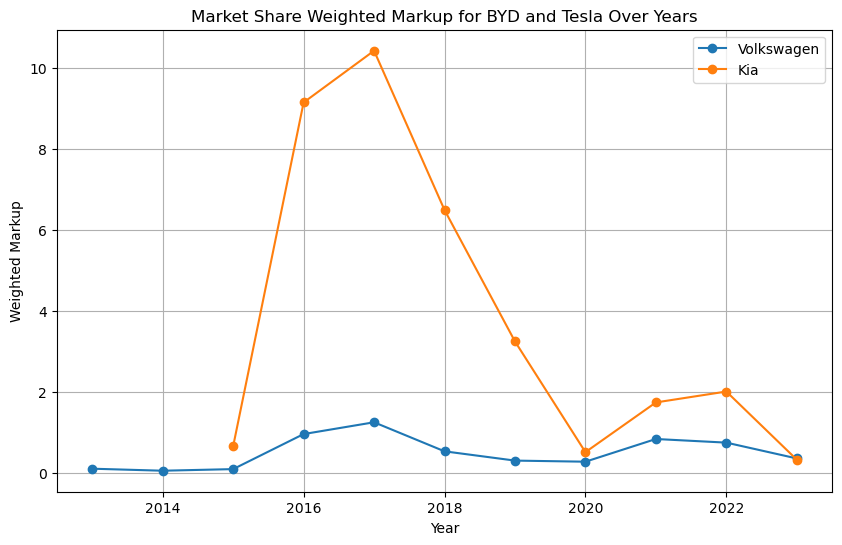

In [21]:
sample = ['Volkswagen', 'Kia']

filtered_result = result[result['Manufacturer'].isin(sample)]

# Pivot the data to have manufacturers as columns
pivot_data = filtered_result.pivot(index='Year', columns='Manufacturer', values='Weighted_Markup')

# Plotting
plt.figure(figsize=(10, 6))
for i in sample:
    plt.plot(pivot_data.index, pivot_data[i], marker='o', linestyle='-', label=i)


plt.title('Market Share Weighted Markup for BYD and Tesla Over Years')
plt.xlabel('Year')
plt.ylabel('Weighted Markup')
plt.legend()
plt.grid(True)
plt.show()

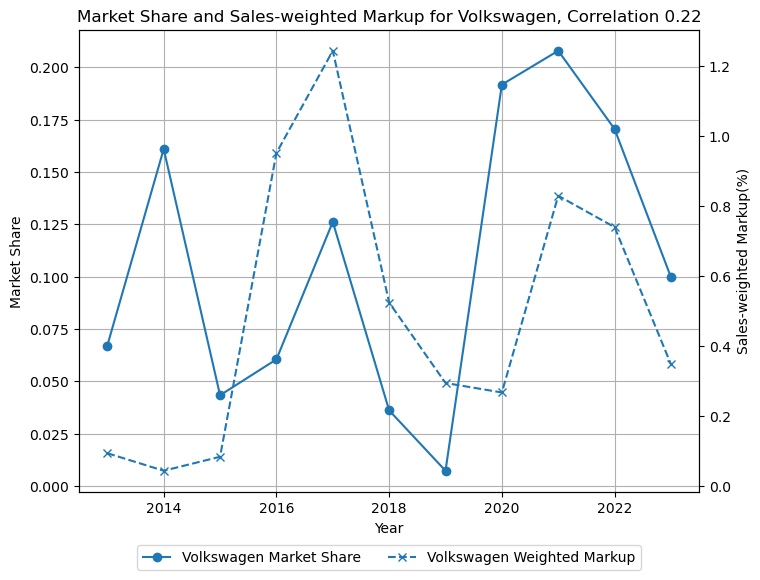

In [31]:
market_share_data = logit_data.groupby(['Manufacturer', 'Year'])['Market_share'].sum().reset_index()
markup_data = logit_data.groupby(['Manufacturer', 'Year']).apply(weighted_markup).reset_index()
markup_data.columns = ['Manufacturer', 'Year', 'Weighted_Markup']

merged_data = pd.merge(market_share_data, markup_data, on=['Manufacturer', 'Year'])

sample = ['Volkswagen']
filtered_data = merged_data[merged_data['Manufacturer'].isin(sample)]

pivot_market_share = filtered_data.pivot(index='Year', columns='Manufacturer', values='Market_share')
pivot_markup = filtered_data.pivot(index='Year', columns='Manufacturer', values='Weighted_Markup')

# Plotting
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot market share on primary y-axis
for manufacturer in sample:
    if manufacturer in pivot_market_share.columns:
        ax1.plot(pivot_market_share.index, pivot_market_share[manufacturer], marker='o', linestyle='-', label=f'{manufacturer} Market Share')

ax1.set_xlabel('Year')
ax1.set_ylabel('Market Share')
ax1.legend(loc='upper left')
ax1.grid(True)

ax2 = ax1.twinx()

for manufacturer in sample:
    if manufacturer in pivot_markup.columns:
        ax2.plot(pivot_markup.index, pivot_markup[manufacturer], marker='x', linestyle='--', label=f'{manufacturer} Weighted Markup')

ax2.set_ylabel('Sales-weighted Markup(%)')

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)

plt.title(f'Market Share and Sales-weighted Markup for {sample[0]}, Correlation {np.corrcoef(pivot_market_share[sample[0]], pivot_markup[sample[0]])[0,1]:.2f}')
plt.show()

# Sammenligner forskellige cost udregninger

In [23]:
cost_description = logit_data['Cost'].describe()
firm_cost_description = logit_data['firm_cost'].describe()
price_description = logit_data['Price'].describe()
#print(cost_description)

In [24]:
analysis_data = logit_data[logit_data['Year']==2023].copy()
analysis_data = analysis_data[analysis_data['Model'].isin(['I7', 'Model 3', 'Model Y', 'ID.4', 'Enyaq iV', 'Ocean' , '2', 'Ioniq 6', 'Q4 e-tron'
                                                           , '4', 'Euniq6', 'Atto 3', 'Marvel R', 'Dolphin', 'Seal'])]
analysis_data.reset_index(drop=True, inplace=True)
#analysis_data

# Grafer og tables

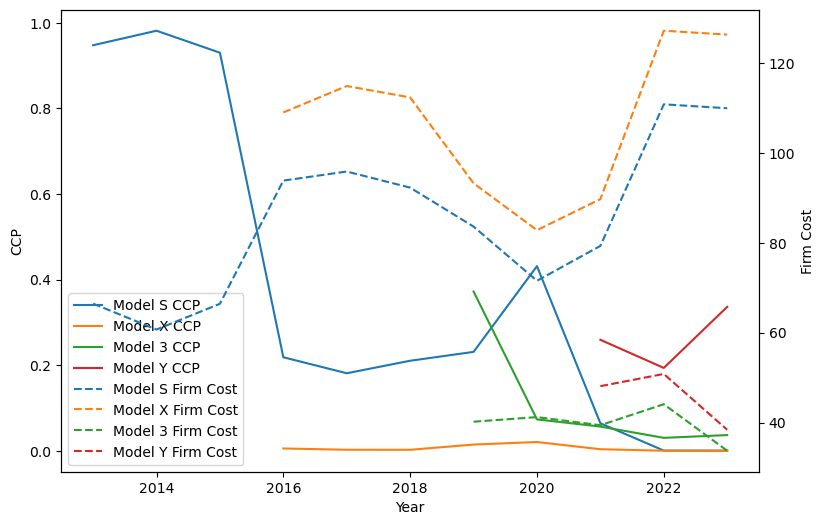

In [42]:
fun.cost_firm(logit_data, alpha)
logit_data['firm_cost'].describe()
logit_data[logit_data['Manufacturer'] == 'Tesla']

logit_data_tesla = logit_data[logit_data['Manufacturer'] == 'Tesla']
unique_models = logit_data_tesla['Model'].unique()


fig, ax1 = plt.subplots(figsize=(9, 6))  #størrelse


for model in unique_models:

    model_data = logit_data_tesla[logit_data_tesla['Model'] == model]
    
    year = model_data['Year'].values
    ccp = model_data['CCP'].values
    firm_cost = model_data['firm_cost'].values
      
    ax1.plot(year, ccp, label=f'{model} CCP')


ax2 = ax1.twinx()

#cost line
for model in unique_models:
    
    model_data = logit_data_tesla[logit_data_tesla['Model'] == model]
    
    year = model_data['Year'].values
    firm_cost = model_data['firm_cost'].values
    
    ax2.plot(year, firm_cost, linestyle='--', label=f'{model} Firm Cost')

ax1.set_xlabel('Year')
ax1.set_ylabel('CCP')
ax2.set_ylabel('Firm Cost')

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='lower left')
#plt.show()


In [26]:
OLS = sm.ols('firm_cost ~ Price + Range + HP + Chargetime + China', logit_data).fit(cov_type='HC3')
OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              firm_cost   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.532e+05
Date:                Mon, 27 May 2024   Prob (F-statistic):               0.00
Time:                        18:28:02   Log-Likelihood:                -319.26
No. Observations:                 334   AIC:                             650.5
Df Residuals:                     328   BIC:                             673.4
Df Model:                           5                                         
Covariance Type:                  HC3                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4830      0.152      3.177      0.001       0.185       0.781
Price          1.0140      0.002    435.468      0.000       1.009       1.019
Range         -0.0146      0.005     -3.169      0.002      -0.024      -0.006
HP            -0.0377      0.007     -5.543      0.000      -0.051      -0.024
Chargetime    -0.0009      0.003     -0.344      0.731      -0.006       0.004
China          0.6490      0.114      5.683      0.000       0.425       0.873
==============================================================================
Omnibus:                      204.000   Durbin-Watson:                   1.486
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1801.799
Skew:                          -2.452   Prob(JB):                         0.00
Kurtosis:                      13.267   Cond. No.                         450.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

# True market share vs estimated market share

In [41]:
#logit_data_columns = ['ID', 'Model', 'Year', 'Manufacturer' ,'Country', 'Market_share', 'Price', 'Range', 'HP', 'Chargetime', 'China', 'CCP', 'firm_cost', 'markup']
def ccp_error(group):
    return group['CCP'].mean() - group['Market_share'].mean()

# Group by Manufacturer and Year and apply the weighted markup calculation
result = logit_data.groupby(['Manufacturer', 'Year']).apply(ccp_error).reset_index()
# Rename columns for clarity
result.columns = ['Manufacturer', 'Year', 'Error']

#Display the resulting DataFrame
print(result[result['Manufacturer']=='Kia'])

   Manufacturer  Year     Error
62          Kia  2015  0.031489
63          Kia  2016  0.426343
64          Kia  2017  0.483518
65          Kia  2018  0.318279
66          Kia  2019  0.074882
67          Kia  2020 -0.015291
68          Kia  2021  0.014816
69          Kia  2022  0.026909
70          Kia  2023 -0.000618
